In [1]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import numpy as np
import pandas as pd
import random, re

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
from functools import reduce

In [11]:
y1_path = "generated_solos/12_bar_simple.csv"
y2_path = "generated_solos/Garrett_Generated.csv"
y3_path = "generated_solos/Carter_Generated.csv"

In [12]:
y1 = pd.read_csv(y1_path)
y2 = pd.read_csv(y2_path)
y3 = pd.read_csv(y3_path)

## Note Distribution

In [13]:
y1_name_prop = y1["note_name"].value_counts()/sum(y1["note_name"].value_counts())
y2_name_prop = y2["note_name"].value_counts()/sum(y2["note_name"].value_counts())
y3_name_prop = y3["note_name"].value_counts()/sum(y3["note_name"].value_counts())

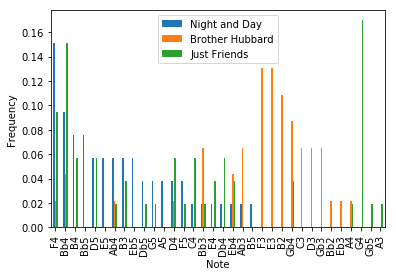

In [20]:
y1_name_df = pd.DataFrame(y1_name_prop).reset_index()
y2_name_df = pd.DataFrame(y2_name_prop).reset_index()
y3_name_df = pd.DataFrame(y3_name_prop).reset_index()
dfs = [y1_name_df, y2_name_df, y3_name_df]
df_final = reduce(lambda left, right: pd.merge(left, right, on='index', how = 'outer'), dfs)
df_final.fillna(0)
df_final.columns = ["note_name", "Night and Day","Brother Hubbard", "Just Friends"]
note_plot = df_final.plot.bar(x = "note_name")
note_plot.set_xlabel("Note")
note_plot.set_ylabel("Frequency")

## Duration Distribution

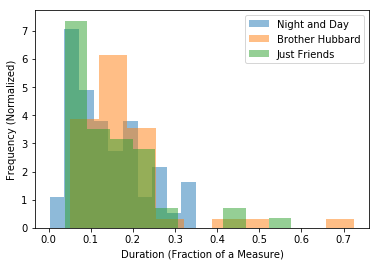

In [22]:
y1_dur = y1["duration"]
y2_dur = y2["duration"]
y3_dur = y3["duration"]

plt.hist(y1_dur, normed = True, alpha = 0.5, label = 'Night and Day') #, bins, alpha=0.5, label='x')
plt.hist(y2_dur, normed = True, alpha = 0.5, label = 'Brother Hubbard') #, bins, alpha=0.5, label='y')
plt.hist(y3_dur, normed = True, alpha = 0.5, label = 'Just Friends')
plt.legend(loc='upper right')
plt.xlabel("Duration (Fraction of a Measure)")
plt.ylabel("Frequency (Normalized)")
plt.show()